**BINARY CLASSIFIER THAT STATES WHETHER THE INPUT IS A FACE OR NOT**

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [0]:
def untar_data_ext(url:str, ext) -> Path:
    "Download `url` (not including extension) and extract to default datapath."
    dest = url2path(url)
    if not dest.exists():
        fname = download_data(url, ext=ext)
        tarfile.open(fname, 'r:gz').extractall(dest.parent)
    return dest

In [4]:
#http://vis-www.cs.umass.edu/lfw/lfw-a.tgz
positivesPath = untar_data("http://vis-www.cs.umass.edu/lfw/lfw-a")
positivesPath

PosixPath('/root/.fastai/data/lfw-a')

In [5]:
rootDir = positivesPath.parent
rootDir

PosixPath('/root/.fastai/data')

In [0]:
%cat /usr/local/lib/python3.6/dist-packages/fastai/datasets.py

In [6]:
# Let's use a dataset of dog faces as negatives in a first attempt
negativesUrl1 = "http://www.recod.ic.unicamp.br/~rwerneck/datasets/flickr-dog/Flickr-dog" #.tar.gz"
#url2path(negativesUrl)
negativesPath1 = untar_data_ext(negativesUrl1, ".tar.gz")
negativesPath1

PosixPath('/root/.fastai/data/Flickr-dog')

In [7]:
rootClassifierDataDir = rootDir/'faceBinaryClassifier'
rootClassifierDataDir

PosixPath('/root/.fastai/data/faceBinaryClassifier')

In [0]:
%mkdir $rootClassifierDataDir

In [9]:
%ls $rootDir

faceBinaryClassifier/  Flickr-dog/  Flickr-dog.tar.gz  lfw/  lfw-a.tgz


In [10]:
%pwd

'/content'

In [11]:
%cd $rootDir

/root/.fastai/data


In [12]:
%mv Flickr-dog/ $rootClassifierDataDir
%mv lfw $rootClassifierDataDir
%ls

faceBinaryClassifier/  Flickr-dog.tar.gz  lfw-a.tgz


In [13]:
%ls $rootClassifierDataDir

Flickr-dog/  lfw/


In [14]:
%rm Flickr-dog.tar.gz  lfw-a.tgz
%cd $rootClassifierDataDir
%mkdir positives negatives
%ls

/root/.fastai/data/faceBinaryClassifier
Flickr-dog/  lfw/  negatives/  positives/


In [15]:
%mv Flickr-dog/ negatives/
%mv lfw positives/
%ls . ./* ./*/*

.:
negatives/  positives/

./negatives:
Flickr-dog/

./negatives/Flickr-dog:
Apolo/          Chloe/       Eve/     Meeshka/  Princesa/  Skye/
Bailey/         Clara/       Gracie/  Monty/    Purcy/     Tala/
Bandit/         Cody/        Injun/   Newton/   Rave/      Wilco/
Bella/          Dakota/      Kira/    Nikita/   Rico/      Winston/
Bella-Kappel/   Dakota-CNC/  Koda/    Noodles/  Ridley/    Yoda/
Bella-Theresa/  Doris/       Landy/   Oliver/   Roscoe/    Zeus-Rekel/
Bu-chan/        Duke/        Lulu/    Peaches/  Skipper/   Zowie/

./positives:
lfw/

./positives/lfw:
Aaron_Eckhart/                 Amanda_Coetzer/
Aaron_Guiel/                   Amanda_Marsh/
Aaron_Patterson/               Amanda_Plumer/
Aaron_Peirsol/                 Amber_Frey/
Aaron_Pena/                    Amber_Tamblyn/
Aaron_Sorkin/                  Ambrose_Lee/
Aaron_Tippin/                  Amelia_Vega/
Abba_Eban/                     Amelie_Mauresmo/
Abbas_Kiarostami/              Amer_al-Saadi/
Abdel_Aziz_

Showing one negative example...

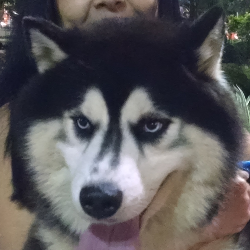

In [16]:
from IPython.display import Image
Image(filename=str(rootClassifierDataDir/'negatives/Flickr-dog/Apolo/Apolo__01-crp.png')) 

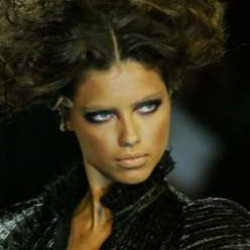

In [17]:
# List one positive example
positiveExample1Root = rootClassifierDataDir/'positives/lfw/Adriana_Lima'
Image(filename=str(positiveExample1Root/os.listdir(positiveExample1Root)[0]))

Basic setup of inputs

In [0]:
data = (ImageList.from_folder(rootClassifierDataDir)
        .split_by_rand_pct(0.2, seed=1)
        #.split_by_folder()              # split in train/valid by folder
        #.label_from_re('(positives)')   # label based on regex
        #.label_from_re('(negatives)')
        .label_from_func(lambda x: 'positive' if 'positives' in str(x) else 'negative')
        #.label_from_func(lambda x: ) # label based on func
        #.add_test_folder()              
        #.transform(tfms, size=64)       # data augmentation
        .databunch())

In [19]:
dict = {}
for label in data.train_ds.y:
  key = label if label else 'Empty'
  dict[key] = dict.get(key, -1) + 1
dict

{Category negative: 293, Category positive: 848}

In [0]:
#%cat /usr/local/lib/python3.6/dist-packages/fastai/vision/data.py
#%cat /usr/local/lib/python3.6/dist-packages/fastai/basic_data.py
%cat /usr/local/lib/python3.6/dist-packages/fastai/data_block.py

In [0]:
??cnn_learner

# TRAINING 1: FIT WITH RESNET 18 NOT PRETRAINED

In [0]:
learner1 = cnn_learner(data, models.resnet18, pretrained=False, metrics=accuracy)

In [0]:
learner1.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.460605,1.804603,0.719298,06:57
1,0.242829,1.854703,0.719298,06:57
2,0.157760,0.119216,0.964912,06:56
3,0.119153,0.085093,0.964912,06:55
4,0.084983,0.386056,0.908772,06:55


In [0]:
# Overfitting? Too high error on training set to be true
learner1.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.018601,0.135659,0.943860,06:57


In [0]:
learner1.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.022397,0.091297,0.971930,06:55


In [0]:
learner1.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.036786,0.041339,0.985965,06:55


# TRAINING 2: FIT 1 CYCLE WITH RESNET 18 NOT PRETRAINED

In [0]:
learner2 = cnn_learner(data, models.resnet18, pretrained=False, metrics=accuracy)
learner2.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.524813,0.815184,0.312281,06:54


In [0]:
learner2.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.208945,1.148851,0.719298,06:56


In [0]:
learner2.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.101595,0.299461,0.859649,06:57


In [0]:
learner2.fit_one_cycle(1)

**Training 2b: raise cycle length**

In [0]:
learner2b = cnn_learner(data, models.resnet18, pretrained=False, metrics=accuracy)
learner2b.fit_one_cycle(1)